In [64]:
import cv2
import numpy as np
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
# Load the image
#image = io.imread('IMG_6228.JPG')
#gray = rgb2gray(image)
#edges = canny(gray)
image1 = cv2.imread('IMG_6228.JPG')
def align_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)
# Apply edge detection



# Find contours
    contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort by area

# Assume the largest contour is the sheet
    sheet_contour = contours[2]

# Approximate the sheet's contour to a quadrilateral
    epsilon = 0.02 * cv2.arcLength(sheet_contour, True)
    approx = cv2.approxPolyDP(sheet_contour, epsilon, True)

# Ensure we have four points (a quadrilateral)
    if len(approx) == 4:
        # Sort the points in the required order
        points = approx.reshape(4, 2)
        rect = np.zeros((4, 2), dtype='float32')

        s = points.sum(axis=1)
        rect[0] = points[np.argmin(s)]  # Top-left
        rect[2] = points[np.argmax(s)]  # Bottom-right

        diff = np.diff(points, axis=1)
        rect[1] = points[np.argmin(diff)]  # Top-right
        rect[3] = points[np.argmax(diff)]  # Bottom-left

    # Define the standard rectangle for the aligned sheet
        (width, height) = (500, 700)  # Adjust these values based on the sheet's size
        dst = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype='float32')

    # Compute the perspective transform matrix
        M = cv2.getPerspectiveTransform(rect, dst)

    # Apply perspective warp
        aligned_sheet = cv2.warpPerspective(image1, M, (width, height))
        return aligned_sheet
    # Display the aligned sheet
    else:
        print("Sheet alignment failed: Unable to detect 4 corners.")

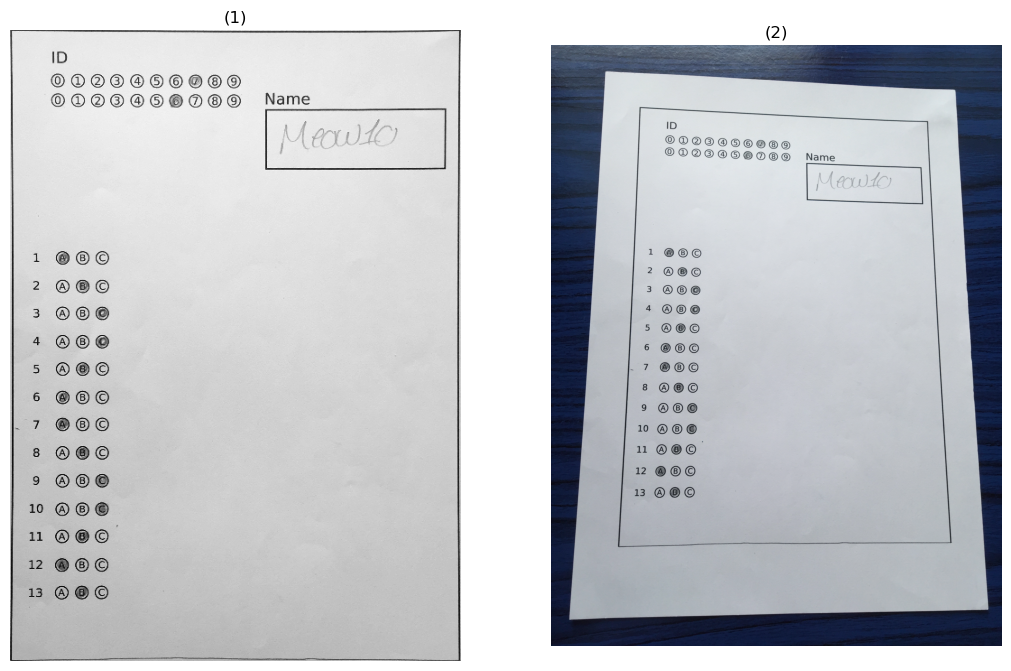

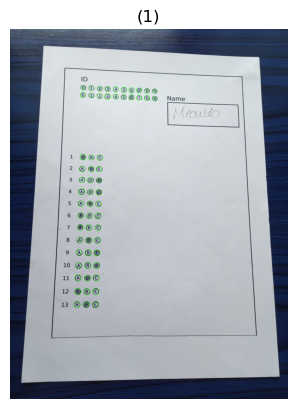

In [72]:





image = cv2.imread('IMG_6228.JPG')
#aligned_sheet=align_image(image)
#gray = cv2.cvtColor(aligned_sheet, cv2.COLOR_BGR2GRAY)
#show_images([gray,image1])




image = cv2.imread('IMG_6228.JPG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred = cv2.GaussianBlur(gray, (9, 9), 2)
thresholded = cv2.adaptiveThreshold(
blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

   
circles = cv2.HoughCircles(
    thresholded,
    cv2.HOUGH_GRADIENT,
    dp=1.0,
    minDist=20,          
    param1=50,           
    param2=30,           
    minRadius=5,         
    maxRadius=30       
)

   
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        
        cv2.circle(image, (x, y), r, (0, 255, 0), 2)
        cv2.circle(image, (x, y), 2, (0, 0, 255), 3)



show_images([image])

